## Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
start = pd.read_csv("E:\\EXCELR\\PARTH SIR\\inclass excercises\\50_Startups.csv")
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA and Data visualization.

In [3]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#check for missing values
start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
start.rename(columns={"R&D Spend":"RDS","Administration":"Admin","Marketing Spend":"Mar","State":"State","Profit":"Pft"}
             ,inplace=True)

In [7]:
start.describe()

,RDS,Admin,Mar,Pft
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
start.corr()

,RDS,Admin,Mar,Pft
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mar,0.724248,-0.032154,1.000000,0.747766
Pft,0.972900,0.200717,0.747766,1.000000


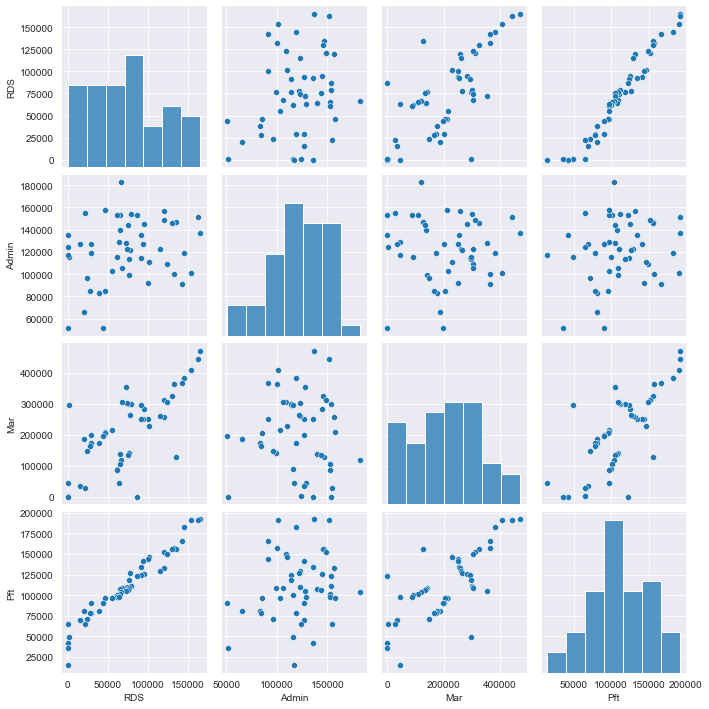

In [9]:
sns.set_style(style="darkgrid")
sns.pairplot(start)

### Building the model.

In [10]:
import statsmodels.formula.api as smf 
model = smf.ols('Pft~RDS+Admin+Mar',data=start).fit()

In [11]:
model.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
Mar              0.027228
dtype: float64

In [12]:
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
Mar           1.655077
dtype: float64 
 Intercept    0.00000
RDS          0.00000
Admin        0.60176
Mar          0.10472
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
ml_a=smf.ols('Pft~Admin',data = start).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues) # Admin has significant 

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [15]:
ml_m=smf.ols('Pft~Mar',data = start).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept    7.808356
Mar          7.802657
dtype: float64 
 Intercept    4.294735e-10
Mar          4.381073e-10
dtype: float64


In [16]:
ml_am=smf.ols('Pft~Admin+Mar',data = start).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues)  

Intercept    1.142741
Admin        2.467779
Mar          8.281039
dtype: float64 
 Intercept    2.589341e-01
Admin        1.729198e-02
Mar          9.727245e-11
dtype: float64


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


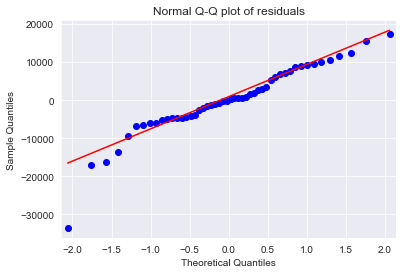

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
list(np.where(model.resid < -30000))

[array([49], dtype=int64)]

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

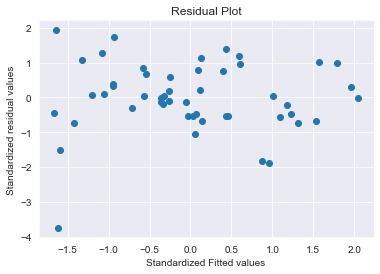

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

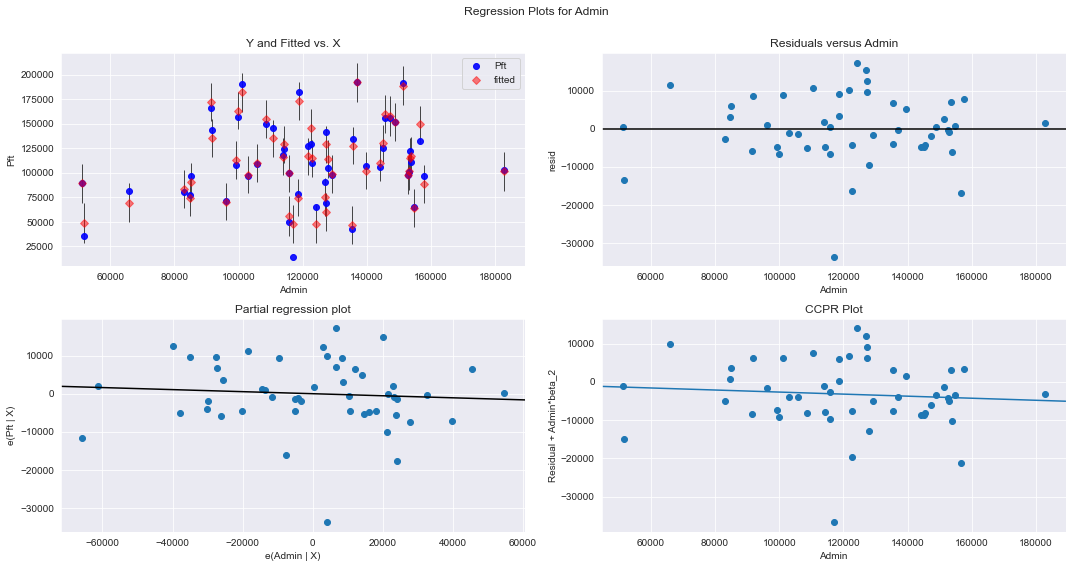

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

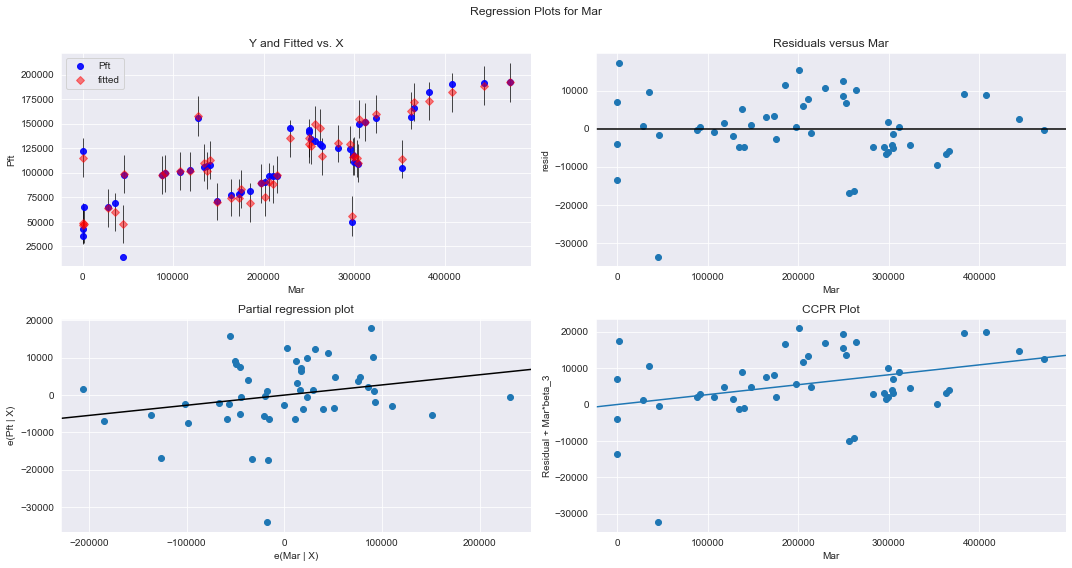

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Mar", fig=fig)
plt.show()

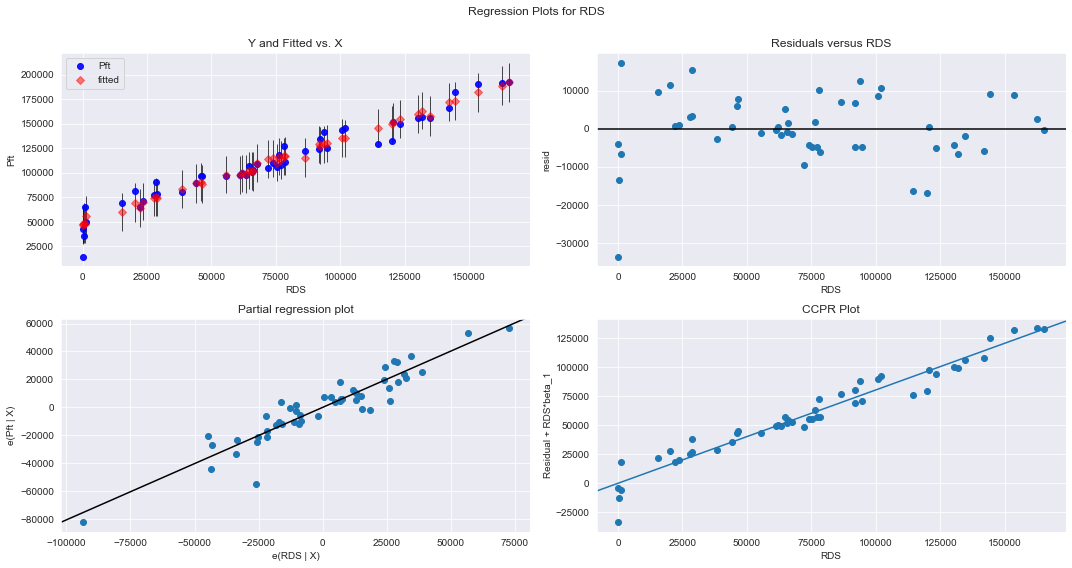

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

In [24]:
model_influence =model.get_influence()
(c,_) = model_influence.cooks_distance

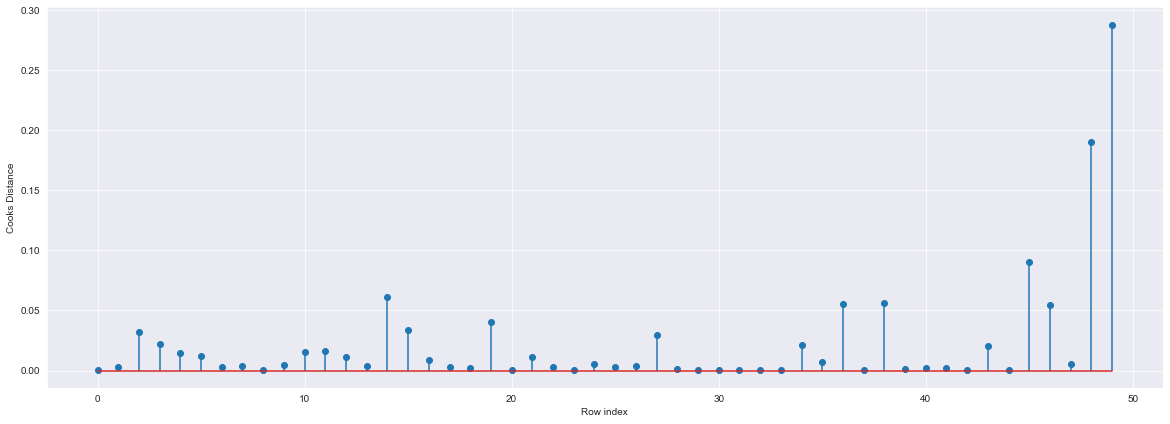

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(start)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432623)

### Using Influence plot and cook distance algorithm treating the outlier's.

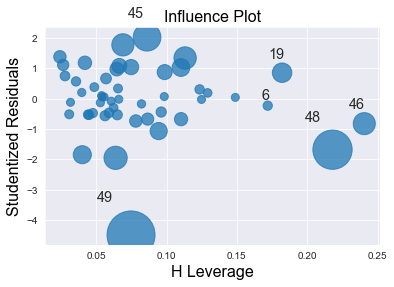

In [27]:
influence_plot(model)
plt.show()

In [28]:
k = start.shape[1]
n = start.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [29]:
start[start.index.isin([49,48])]

,RDS,Admin,Mar,State,Pft
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [30]:
start.head()

,RDS,Admin,Mar,State,Pft
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
start1=start.drop(start.index[[48]],axis=0).reset_index()

In [32]:
start1=start1.drop(['index'],axis=1)

In [33]:
start1

,RDS,Admin,Mar,State,Pft
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
final_ml_a= smf.ols('Pft~Admin+RDS',data = start1).fit()

In [35]:
(final_ml_a.rsquared,final_ml_a.aic)

(0.9482776031402543, 1035.337798019223)

In [36]:
final_ml_m= smf.ols('Pft~Mar+RDS',data = start1).fit()

In [37]:
(final_ml_m.rsquared,final_ml_m.aic)

(0.9484949584528184, 1035.131449276685)

In [38]:
model_influence_m = final_ml_m.get_influence()
(c_V, _) = model_influence_m.cooks_distance

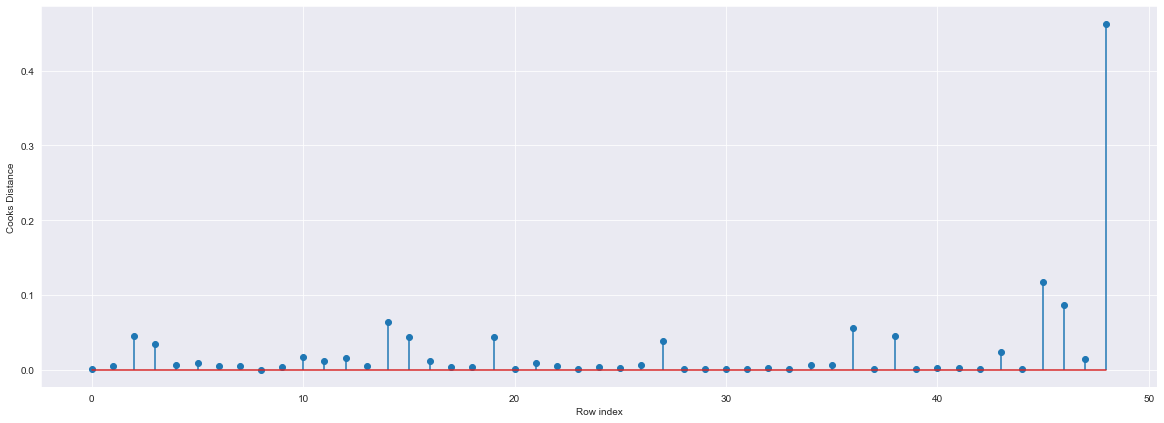

In [39]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start1)),np.round(c_V,5));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [40]:
(np.argmax(c_V),np.max(c_V))

(48, 0.4630988489118262)

In [41]:
start2=start1.drop(start1.index[[48]],axis=0)

In [42]:
start2

,RDS,Admin,Mar,State,Pft
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
start3=start2.reset_index()

In [44]:
start4=start3.drop(['index'],axis=1)

In [45]:
start4

,RDS,Admin,Mar,State,Pft
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
final_ml_M= smf.ols('Pft~Mar+RDS',data = start4).fit()

In [47]:
(final_ml_M.rsquared,final_ml_M.aic)

(0.9609119875752478, 994.8864429429412)